<a href="https://colab.research.google.com/github/dakyungsilvialee/Financial-Accounting-with-Python/blob/main/Analyzing_Australian_Tax_Return_Data_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Australian Tax Return Data- Part II

## Background Information

In this case study you will explore Australian corporations’ tax return data. Australia (unlike the United States) publicly discloses three line items from large corporations’ tax returns. The three line items disclosed are:

- **Total Income**- Total income is a measure of a company’s gross receipts or revenue. It does not include any deductions or expenses.


- **Taxable Income** - Taxable income is a measure of a company’s profitability based on Australian tax law. Taxable income is the basis from which a company’s income tax liability is calculated.
   - The difference between a company’s total income and it’s taxable income is the amount of tax deductions or expenses a company claims on its tax return.
   
<center> <font color = blue> <font size = 4> $Taxable Income$ <font color = black> $=$ <font color = red> $Total  Income$ <font color = black> $- Tax Deductions$ </center>

   - Taxable income is separate and distinct from a company’s financial accounting income. Although both financial accounting income and taxable income measure a firm’s profitability, they are calculated differently.
      - Financial accounting income is designed to measure a firm’s economic transactions and to be as informative as possible to investors and creditors.
      - Taxable income is defined by the government and is designed to raise money and to encourage or discourage certain behaviors. For example, in the United States, we are allowed to deduct interest incurred on a household mortgage because the government wants to encourage home ownership.


- **Tax Payable**- Tax payable is a company’s Australian income tax liability and measures the amount of income taxes that the company must pay to Australia’s federal government.
   - Tax payable is a function of a company’s taxable income. If the company does not claim any tax credits, tax payable will equal 30% of a company’s taxable income. 30% is the corporate income tax rate in Australia. 
   
<center> <font color = green> <font size = 4> $Tax Payable$ <font color = black> $=$ <font color = blue> $Taxable Income$ <font color = black> $*Tax Rate (30\%\ in Australia)$ </center>

   - Tax payable will be less than a company’s taxable income times the income tax rate if the company claims any tax credits.

<center> <font color = green> <font size = 4> $Tax Payable$ <font color = black> $=$ <font color = blue> $Taxable Income$ <font color = black> $*30\%-Tax Credits$ </center>
	
   - Tax credits are a way for the government to subsidize certain corporate activities. Tax credits allow the government to indirectly pay a corporation back for the amount of money a corporation spent on a certain activity. For instance, in the United States, some students qualify for tuition tax credits. By giving a student a tuition tax credit, the government allows a student to pay less taxes than the amount the student would normally owe based on the student’s taxable income. This way, the student can pay for the student’s tuition with the money the student saved by not paying taxes. These transactions are an indirect way for the government to pay for the student’s tuition. In corporations, the most common tax credit is for research and development (R&D). Many governments want to encourage R&D as innovation often leads to economic growth.

The following equation summarizes the relationship between the three variables:

<center> <font size = 4> <font color = red> $(Total Income$ </font> $-Tax Deductions)*30\%-Tax Credits=$ <font color = green> $Tax Payable$ </font> </center>

The Australian government started to publicly disclose large corporation’s tax return information in December 2015. Due to the long nature of the tax reporting cycle, information disclosed in December 2015 relates to tax returns for years ending December 1, 2013 – November 30th, 2014 (most Australian firms have a June 30th year end).

The Australian government’s tax transparency legislation has two stated objectives: 

> 1. Discourage large corporate entities from engaging in aggressive tax avoidance practices
> 2. Provide more information to inform public debate about tax policy
> *Australian Senate 2013* 
    
    
Australian legislators hoped that if large firms were forced to report their tax information, public shaming would cause low tax paying firms (firms that engage in a lot of tax planning) to pay more taxes. In this case study, you will explore that idea.

In [ ]:
# set up your notebook

import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# reimport the pickle file
final = pd.read_pickle('part1.p')
final

,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00"
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00"
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00"
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00"
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00"
...,...,...,...,...,...,...,...
4569,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2015,"16,283,100.00","104,973,479.00","1,379,106,272.00"
4570,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2016,"25,735,708.00","136,982,422.00","1,541,150,451.00"
4571,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2017,"46,511,732.00","229,666,422.00","2,124,355,799.00"
4572,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2018,"59,389,437.00","271,817,164.00","2,957,379,565.00"


## Calculate your Results - #1

**a.**	How much total tax did the ATO collect from our sample firms in each year?

In [ ]:

Tax_payable_2013 = final.loc[final['Income Year'] == 2013, 'Tax payable'].sum()
Tax_payable_2014 = final.loc[final['Income Year'] == 2014, 'Tax payable'].sum()
Tax_payable_2015 = final.loc[final['Income Year'] == 2015, 'Tax payable'].sum()
Tax_payable_2016 = final.loc[final['Income Year'] == 2016, 'Tax payable'].sum()
Tax_payable_2017 = final.loc[final['Income Year'] == 2017, 'Tax payable'].sum()
Tax_payable_2018 = final.loc[final['Income Year'] == 2018, 'Tax payable'].sum()
Tax_payable_2019 = final.loc[final['Income Year'] == 2019, 'Tax payable'].sum()


In [ ]:
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
tax_payable = [Tax_payable_2013, Tax_payable_2014, Tax_payable_2015, Tax_payable_2016, Tax_payable_2017, Tax_payable_2018, Tax_payable_2019]
ato = pd.DataFrame(years, columns = ['years'])
ato['tax_payable'] = tax_payable
ato

,years,tax_payable
0,2013,"40,692,415,624.00"
1,2014,"35,064,670,230.00"
2,2015,"29,198,875,907.00"
3,2016,"32,286,229,707.00"
4,2017,"34,096,312,121.00"
5,2018,"34,059,892,663.00"
6,2019,"33,756,850,433.00"


**b.** Turn your result from (a) into a new dataframe. Calculate the percentage change in total tax collected from year to year for each year in our sample and save the calculation as a new column in your new dataframe.

In [ ]:
percent_change_14 = (Tax_payable_2014 - Tax_payable_2013)/ Tax_payable_2013 *100
percent_change_15 = (Tax_payable_2015 - Tax_payable_2014)/ Tax_payable_2014 *100
percent_change_16 = (Tax_payable_2016 - Tax_payable_2015)/ Tax_payable_2015 *100
percent_change_17 = (Tax_payable_2017 - Tax_payable_2016)/ Tax_payable_2016 *100
percent_change_18 = (Tax_payable_2018 - Tax_payable_2017)/ Tax_payable_2017 *100
percent_change_19 = (Tax_payable_2019 - Tax_payable_2018)/ Tax_payable_2018 *100




In [ ]:
percent_change = [0, percent_change_14, percent_change_15, percent_change_16, percent_change_17, percent_change_18, percent_change_19]
ato['percent_change'] = percent_change
ato

,years,tax_payable,percent_change
0,2013,"40,692,415,624.00",0.00
1,2014,"35,064,670,230.00",-13.83
2,2015,"29,198,875,907.00",-16.73
3,2016,"32,286,229,707.00",10.57
4,2017,"34,096,312,121.00",5.61
5,2018,"34,059,892,663.00",-0.11
6,2019,"33,756,850,433.00",-0.89


**c.**	It is possible that any change documented above is related to a general change in the economy. To provide some evidence, calculate the Total income (revenue) reported by our sample firms in each year and add it as a column to the dataframe you created in (b) above.

In [ ]:
Total_income_2013 = final.loc[final['Income Year'] == 2013, 'Total income'].sum()
Total_income_2014 = final.loc[final['Income Year'] == 2014, 'Total income'].sum()
Total_income_2015 = final.loc[final['Income Year'] == 2015, 'Total income'].sum()
Total_income_2016 = final.loc[final['Income Year'] == 2016, 'Total income'].sum()
Total_income_2017 = final.loc[final['Income Year'] == 2017, 'Total income'].sum()
Total_income_2018 = final.loc[final['Income Year'] == 2018, 'Total income'].sum()
Total_income_2019 = final.loc[final['Income Year'] == 2019, 'Total income'].sum()

Total_income = [Total_income_2013, Total_income_2014, Total_income_2015, Total_income_2016, Total_income_2017, Total_income_2018, Total_income_2019]
ato['Total_income'] = Total_income
ato


,years,tax_payable,percent_change,Total_income
0,2013,"40,692,415,624.00",0.00,"1,321,502,527,669.00"
1,2014,"35,064,670,230.00",-13.83,"1,119,368,229,711.00"
2,2015,"29,198,875,907.00",-16.73,"1,067,094,770,528.00"
3,2016,"32,286,229,707.00",10.57,"981,796,760,171.00"
4,2017,"34,096,312,121.00",5.61,"1,006,285,801,611.00"
5,2018,"34,059,892,663.00",-0.11,"986,763,418,495.00"
6,2019,"33,756,850,433.00",-0.89,"918,040,897,472.00"


There is indeed a direct relationship between Total Income and Tax Payable. The correlation is evident, as the amount of the total income has the same tendency as that of the tax payable, which can be attributed to overall changes in the economy.

**d.** Calculate the percentage of total income reported in each year that is paid to the ATO in each year. Add your result to the dataframe created in (b) above.

In [ ]:
Tax_payable_2013 = final.loc[final['Income Year'] == 2013, 'Tax payable'].sum()
Tax_payable_2014 = final.loc[final['Income Year'] == 2014, 'Tax payable'].sum()
Tax_payable_2015 = final.loc[final['Income Year'] == 2015, 'Tax payable'].sum()
Tax_payable_2016 = final.loc[final['Income Year'] == 2016, 'Tax payable'].sum()
Tax_payable_2017 = final.loc[final['Income Year'] == 2017, 'Tax payable'].sum()
Tax_payable_2018 = final.loc[final['Income Year'] == 2018, 'Tax payable'].sum()
Tax_payable_2019 = final.loc[final['Income Year'] == 2019, 'Tax payable'].sum()

percent_tax_payable_2013 = (Tax_payable_2013/Total_income_2013)*100
percent_tax_payable_2014 = (Tax_payable_2014/Total_income_2014)*100
percent_tax_payable_2015 = (Tax_payable_2015/Total_income_2015)*100
percent_tax_payable_2016 = (Tax_payable_2016/Total_income_2016)*100
percent_tax_payable_2017 = (Tax_payable_2017/Total_income_2017)*100
percent_tax_payable_2018 = (Tax_payable_2018/Total_income_2018)*100
percent_tax_payable_2019 = (Tax_payable_2013/Total_income_2019)*100

percent_tax_payable = [percent_tax_payable_2013,percent_tax_payable_2014,percent_tax_payable_2015,percent_tax_payable_2016,percent_tax_payable_2017,percent_tax_payable_2018,percent_tax_payable_2019]
ato['percent_tax_payable'] = percent_tax_payable
ato






,years,tax_payable,percent_change,Total_income,percent_tax_payable
0,2013,"40,692,415,624.00",0.00,"1,321,502,527,669.00",3.08
1,2014,"35,064,670,230.00",-13.83,"1,119,368,229,711.00",3.13
2,2015,"29,198,875,907.00",-16.73,"1,067,094,770,528.00",2.74
3,2016,"32,286,229,707.00",10.57,"981,796,760,171.00",3.29
4,2017,"34,096,312,121.00",5.61,"1,006,285,801,611.00",3.39
5,2018,"34,059,892,663.00",-0.11,"986,763,418,495.00",3.45
6,2019,"33,756,850,433.00",-0.89,"918,040,897,472.00",4.43


**e.** Lastly, calculate the percentage change from year to year for the variable you calculated in (d). Add your result to the same dataframe.

In [ ]:
percent_change_tax_payable_14 = ((percent_tax_payable_2014 - percent_tax_payable_2013)/percent_tax_payable_2013) *100
percent_change_tax_payable_15 = ((percent_tax_payable_2015 - percent_tax_payable_2014)/percent_tax_payable_2014) *100
percent_change_tax_payable_16 = ((percent_tax_payable_2016 - percent_tax_payable_2015)/percent_tax_payable_2015) *100
percent_change_tax_payable_17 = ((percent_tax_payable_2017 - percent_tax_payable_2016)/percent_tax_payable_2016) *100
percent_change_tax_payable_18 = ((percent_tax_payable_2018 - percent_tax_payable_2017)/percent_tax_payable_2017) *100
percent_change_tax_payable_19 = ((percent_tax_payable_2019 - percent_tax_payable_2018)/percent_tax_payable_2018) *100

percent_change_tax_payable = [0,percent_change_tax_payable_14, percent_change_tax_payable_15, percent_change_tax_payable_16, percent_change_tax_payable_17, percent_change_tax_payable_18, percent_change_tax_payable_19]
ato['Percent_change_tax_payable'] = percent_change_tax_payable
ato





,years,tax_payable,percent_change,Total_income,percent_tax_payable,Percent_change_tax_payable
0,2013,"40,692,415,624.00",0.00,"1,321,502,527,669.00",3.08,0.00
1,2014,"35,064,670,230.00",-13.83,"1,119,368,229,711.00",3.13,1.73
2,2015,"29,198,875,907.00",-16.73,"1,067,094,770,528.00",2.74,-12.65
3,2016,"32,286,229,707.00",10.57,"981,796,760,171.00",3.29,20.18
4,2017,"34,096,312,121.00",5.61,"1,006,285,801,611.00",3.39,3.04
5,2018,"34,059,892,663.00",-0.11,"986,763,418,495.00",3.45,1.87
6,2019,"33,756,850,433.00",-0.89,"918,040,897,472.00",4.43,28.42


**f.** Interpret your results. Specifically:

- Describe the pattern you notice
- Relate it back to the law change and what the legislators wanted to happen
- Did the law work, explain

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#ABBAEA;>

            
<p style="padding: 10px;
              color:white;">
                           
**#1 Analysis:**
The Australian Government passed a policy in December 2015 to promote transparency and therefore increase the tax collection. The percent change of tax payable in the 2015-2016 period increased by 20.18%, substantially higher than the 10.57% increase in Total Income. Therefore, even though the companies reported an increase in total income -hinting an economic boom- there is still a higher increase of the taxes that were collected. In addition, after 2015, there was a steady increase in the percentage of tax payable to total income ratio, highlighting the efficiency of the policy.
                           
                           
                           
                           


## Calculate your Results - #2

**a.**	For *each* firm in each year, calculate the following:
- Taxes Paid as a Percentage of Taxable Income
- Taxes Paid as a Percentage of Total Income
- Percentage change in Taxable income from year to year
- Percentage change in Total income from year to year
- Percentage change in Tax payable from year to year
- Absolute change in first effective tax rate calculated (tax paid/taxable income) from year to year
- Absolute change in second effective tax rate calculated (tax paid/total income) from year to year

In [ ]:
#Taxes Paid as a Percentage of Taxable Income
final['Taxes as % of Taxable Income'] = final['Tax payable']/final['Taxable income'] *100
final['Taxes as % of Taxable Income']

0        NaN
1        NaN
2      30.00
3      30.00
4      30.00
        ... 
4569   15.51
4570   18.79
4571   20.25
4572   21.85
4573     NaN
Name: Taxes as % of Taxable Income, Length: 4574, dtype: float64

In [ ]:
#Taxes Paid as a Percentage of Total Income
final['Taxes as % of Total Income'] = final['Tax payable']/final['Total income'] *100
final['Taxes as % of Total Income']

0      0.00
1      0.00
2      0.95
3      0.97
4      2.44
       ... 
4569   1.18
4570   1.67
4571   2.19
4572   2.01
4573   0.00
Name: Taxes as % of Total Income, Length: 4574, dtype: float64

In [ ]:
#Percentage change in Taxable income from year to year
final['% change in taxable income']=final['Taxable income'].pct_change() * 100
final.loc[final['Income Year'] == 2013, '% change in taxable income'] = np.nan
final.head()

,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00",NaN,0.00,NaN
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00",NaN,0.00,NaN
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00",30.00,0.95,inf
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00",30.00,0.97,-28.52
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00",30.00,2.44,171.69


In [ ]:
#Percentage change in Total income from year to year
final['% change in total income']=final['Total income'].pct_change() * 100
final.loc[final['Income Year'] == 2013, '% change in taxable income'] = np.nan
final.head()


,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income,% change in total income
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00",NaN,0.00,NaN,NaN
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00",NaN,0.00,NaN,4.54
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00",30.00,0.95,inf,67.64
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00",30.00,0.97,-28.52,-29.98
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00",30.00,2.44,171.69,8.08


In [ ]:
#Percentage change in Tax payable from year to year
final['% change in tax payable']=final['Tax payable'].pct_change() * 100
final.loc[final['Income Year'] == 2013, '% change in taxable income'] = np.nan
final.head()

,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income,% change in total income,% change in tax payable
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00",NaN,0.00,NaN,NaN,NaN
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00",NaN,0.00,NaN,4.54,NaN
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00",30.00,0.95,inf,67.64,inf
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00",30.00,0.97,-28.52,-29.98,-28.52
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00",30.00,2.44,171.69,8.08,171.69


In [ ]:
#Absolute change in first effective tax rate calculated (tax paid/taxable income) from year to year

final['ETR'] = final['Tax payable']/final['Taxable income']
final['ETR Change'] = final['ETR'].diff()

final


,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income,% change in total income,% change in tax payable,ETR,ETR Change
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00",NaN,0.00,NaN,NaN,NaN,NaN,NaN
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00",NaN,0.00,NaN,4.54,NaN,NaN,NaN
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00",30.00,0.95,inf,67.64,inf,0.30,NaN
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00",30.00,0.97,-28.52,-29.98,-28.52,0.30,0.00
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00",30.00,2.44,171.69,8.08,171.69,0.30,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2015,"16,283,100.00","104,973,479.00","1,379,106,272.00",15.51,1.18,-49.55,-35.81,-47.72,0.16,0.01
4570,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2016,"25,735,708.00","136,982,422.00","1,541,150,451.00",18.79,1.67,30.49,11.75,58.05,0.19,0.03
4571,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2017,"46,511,732.00","229,666,422.00","2,124,355,799.00",20.25,2.19,67.66,37.84,80.73,0.20,0.01
4572,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2018,"59,389,437.00","271,817,164.00","2,957,379,565.00",21.85,2.01,18.35,39.21,27.69,0.22,0.02


In [ ]:
#Absolute change in second effective tax rate calculated (tax paid/total income) from year to year

final['ETR2'] = final['Tax payable']/final['Total income']
final['ETR2 Change'] = final['ETR2'].diff()

final


,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income,% change in total income,% change in tax payable,ETR,ETR Change,ETR2,ETR2 Change
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00",NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00",NaN,0.00,NaN,4.54,NaN,NaN,NaN,0.00,0.00
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00",30.00,0.95,inf,67.64,inf,0.30,NaN,0.01,0.01
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00",30.00,0.97,-28.52,-29.98,-28.52,0.30,0.00,0.01,0.00
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00",30.00,2.44,171.69,8.08,171.69,0.30,0.00,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2015,"16,283,100.00","104,973,479.00","1,379,106,272.00",15.51,1.18,-49.55,-35.81,-47.72,0.16,0.01,0.01,-0.00
4570,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2016,"25,735,708.00","136,982,422.00","1,541,150,451.00",18.79,1.67,30.49,11.75,58.05,0.19,0.03,0.02,0.00
4571,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2017,"46,511,732.00","229,666,422.00","2,124,355,799.00",20.25,2.19,67.66,37.84,80.73,0.20,0.01,0.02,0.01
4572,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2018,"59,389,437.00","271,817,164.00","2,957,379,565.00",21.85,2.01,18.35,39.21,27.69,0.22,0.02,0.02,-0.00


**b.** Years with zero Taxable income and/or zero Tax payable make it difficult to calculate a percentage change as we cannot divide by zero.
   - If a firm had a Taxable income of 0 and now has a positive Taxable income, python will report a percentage change of infinity, 'inf'. The infinity values prevent python from calculating any summary statistics such as an average or a standard deviation. Create a new column that converts any infinity values into missing values. 
      - You can specify infinity with ```float('inf')```
   - If a firm has a positive Taxable income and now has a Taxable income of 0, we can calculate a percentage change without an issue.
   - If a firm had no Taxable income in either year, python will report a missing percentage change value. This value should really be a percentage change of zero as Taxable income has not changed. In your new column that does not have infinity values also fix the percentage change calculations for firms with no Taxable income in either year.
   - You will need to make all of the same adjustments for Tax payable.


In [ ]:
final.loc[final['% change in taxable income'] == float('inf'), '% change in taxable income'] = np.nan
final.loc[final['Taxable income'] == 0, '% change in taxable income'] = 0
final

,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income,% change in total income,% change in tax payable,ETR,ETR Change,ETR2,ETR2 Change
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00",NaN,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00",NaN,0.00,0.00,4.54,NaN,NaN,NaN,0.00,0.00
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00",30.00,0.95,NaN,67.64,inf,0.30,NaN,0.01,0.01
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00",30.00,0.97,-28.52,-29.98,-28.52,0.30,0.00,0.01,0.00
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00",30.00,2.44,171.69,8.08,171.69,0.30,0.00,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2015,"16,283,100.00","104,973,479.00","1,379,106,272.00",15.51,1.18,-49.55,-35.81,-47.72,0.16,0.01,0.01,-0.00
4570,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2016,"25,735,708.00","136,982,422.00","1,541,150,451.00",18.79,1.67,30.49,11.75,58.05,0.19,0.03,0.02,0.00
4571,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2017,"46,511,732.00","229,666,422.00","2,124,355,799.00",20.25,2.19,67.66,37.84,80.73,0.20,0.01,0.02,0.01
4572,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2018,"59,389,437.00","271,817,164.00","2,957,379,565.00",21.85,2.01,18.35,39.21,27.69,0.22,0.02,0.02,-0.00


In [ ]:
final.loc[final['% change in tax payable'] == float('inf'), '% change in tax payable'] = np.nan
final.loc[final['Tax payable'] == 0, '% change in tax payable'] = 0
final

,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income,% change in total income,% change in tax payable,ETR,ETR Change,ETR2,ETR2 Change
0,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2013,0.00,0.00,"206,773,792.00",NaN,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN
1,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2014,0.00,0.00,"216,169,773.00",NaN,0.00,0.00,4.54,0.00,NaN,NaN,0.00,0.00
2,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2015,"3,441,870.00","11,472,901.00","362,380,100.00",30.00,0.95,NaN,67.64,NaN,0.30,NaN,0.01,0.01
3,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2016,"2,460,297.00","8,200,990.00","253,742,807.00",30.00,0.97,-28.52,-29.98,-28.52,0.30,0.00,0.01,0.00
4,21ST CENTURY RESORT HOLDINGS PTY LTD,33104201014,private,2017,"6,684,387.00","22,281,289.00","274,237,922.00",30.00,2.44,171.69,8.08,171.69,0.30,0.00,0.02,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4569,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2015,"16,283,100.00","104,973,479.00","1,379,106,272.00",15.51,1.18,-49.55,-35.81,-47.72,0.16,0.01,0.01,-0.00
4570,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2016,"25,735,708.00","136,982,422.00","1,541,150,451.00",18.79,1.67,30.49,11.75,58.05,0.19,0.03,0.02,0.00
4571,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2017,"46,511,732.00","229,666,422.00","2,124,355,799.00",20.25,2.19,67.66,37.84,80.73,0.20,0.01,0.02,0.01
4572,ZURICH FINANCIAL SERVICES AUSTRALIA LIMITED,11008423372,public,2018,"59,389,437.00","271,817,164.00","2,957,379,565.00",21.85,2.01,18.35,39.21,27.69,0.22,0.02,0.02,-0.00


**c.** Describe the distributions of the change in effective tax rates and the percentage change in Taxable income, Total income, and Tax payable (i.e. calculate the mean, median, min, max) separately for public and private firms in each year. You may want to transpose the data to make it easier to read.

In [ ]:
#Year 2013

pip install tabulate
from tabulate import tabulate








count     525.00
mean       37.33
std       257.73
min       -99.85
25%       -24.10
50%         0.00
75%        25.50
max     4,031.74
Name: % change in taxable income, dtype: float64

In [ ]:
#Statistics for Public Industry, Percent Change in Taxable Income, 2015
final_public = final.loc[final['Public/Private'] == 'public']
final_public['% change in taxable income'].dropna()
S2015PublicTaxInc = final_public[final_public['Income Year']==2015]['% change in taxable income'].describe()
S2015PublicTaxInc

count      455.00
mean       114.22
std      1,115.50
min        -99.93
25%        -17.32
50%          0.00
75%         28.45
max     16,448.91
Name: % change in taxable income, dtype: float64

In [ ]:
#Statistics for Public Industry, Percent Change in Taxable Income, 2016
final_public = final.loc[final['Public/Private'] == 'public']
final_public['% change in taxable income'].dropna()
S2016PublicTaxInc = final_public[final_public['Income Year']==2016]['% change in taxable income'].describe()
S2016PublicTaxInc

count     416.00
mean       34.09
std       154.20
min       -96.98
25%       -16.05
50%         0.07
75%        32.11
max     1,550.70
Name: % change in taxable income, dtype: float64

In [ ]:
#Statistics for Public Industry, Percent Change in Taxable Income, 2017
final_public = final.loc[final['Public/Private'] == 'public']
final_public['% change in taxable income'].dropna()
S2017PublicTaxInc = final_public[final_public['Income Year']==2017]['% change in taxable income'].describe()
S2017PublicTaxInc

count      395.00
mean        86.83
std        824.52
min        -93.85
25%        -10.09
50%          4.05
75%         35.45
max     15,540.14
Name: % change in taxable income, dtype: float64

In [ ]:
#Statistics for Public Industry, Percent Change in Taxable Income, 2018
final_public = final.loc[final['Public/Private'] == 'public']
final_public['% change in taxable income'].dropna()
S2018PublicTaxInc = final_public[final_public['Income Year']==2018]['% change in taxable income'].describe()
S2018PublicTaxInc

count     367.00
mean       30.17
std       170.19
min       -99.43
25%       -21.06
50%         0.00
75%        24.88
max     1,949.63
Name: % change in taxable income, dtype: float64

In [ ]:
#Statistics for Public Industry, Percent Change in Taxable Income, 2019
final_public = final.loc[final['Public/Private'] == 'public']
final_public['% change in taxable income'].dropna()
S2019PublicTaxInc = final_public[final_public['Income Year']==2019]['% change in taxable income'].describe()
S2019PublicTaxInc

count     355.00
mean       34.34
std       282.75
min       -99.48
25%       -24.60
50%         0.00
75%        18.63
max     4,455.24
Name: % change in taxable income, dtype: float64

-99.94278614258769

**d.**  What percentage of public and private firms reported increases in total income, taxable income and taxes paid in each year (not all three, each separately)? Present your results in a labeled and easy to read table (a DataFrame makes for a nice table).

Note- infinity values will not affect these calculations.

In [ ]:
#Public - Total Income
final_public = final.loc[final['Public/Private'] == 'public']

pub_totinc = []
pub_totinc_2014 = final_public.loc[final_public['Income Year'] == 2014]
firms_totinc_2014 = len(pub_totinc_2014[pub_totinc_2014['% change in total income'] > 0])/len(pub_totinc_2014['% change in total income']) * 100
firms_totinc_2014
pub_totinc.append(firms_totinc_2014)

pub_totinc_2015 = final_public.loc[final_public['Income Year'] == 2015]
firms_totinc_2015 = len(pub_totinc_2015[pub_totinc_2015['% change in total income'] > 0])/len(pub_totinc_2015['% change in total income']) * 100
firms_totinc_2015
pub_totinc.append(firms_totinc_2015)

pub_totinc_2016 = final_public.loc[final_public['Income Year'] == 2016]
firms_totinc_2016 = len(pub_totinc_2016[pub_totinc_2016['% change in total income'] > 0])/len(pub_totinc_2016['% change in total income']) * 100
firms_totinc_2016
pub_totinc.append(firms_totinc_2016)

pub_totinc_2017 = final_public.loc[final_public['Income Year'] == 2017]
firms_totinc_2017 = len(pub_totinc_2017[pub_totinc_2017['% change in total income'] > 0])/len(pub_totinc_2017['% change in total income']) * 100
firms_totinc_2017
pub_totinc.append(firms_totinc_2017)

pub_totinc_2018 = final_public.loc[final_public['Income Year'] == 2018]
firms_totinc_2018 = len(pub_totinc_2018[pub_totinc_2018['% change in total income'] > 0])/len(pub_totinc_2018['% change in total income']) * 100
firms_totinc_2018
pub_totinc.append(firms_totinc_2018)

pub_totinc_2019 = final_public.loc[final_public['Income Year'] == 2019]
firms_totinc_2019 = len(pub_totinc_2019[pub_totinc_2019['% change in total income'] > 0])/len(pub_totinc_2019['% change in total income']) * 100
firms_totinc_2019
pub_totinc.append(firms_totinc_2019)

pub_totinc



[60.1904761904762,
 58.76068376068376,
 41.833333333333336,
 51.493848857644984,
 50.950570342205324,
 37.13163064833006]

In [ ]:
#Private - Total Income
final_private = final.loc[final['Public/Private'] == 'private']

priv_totinc = []
priv_totinc_2014 = final_private.loc[final_private['Income Year'] == 2014]
priv_totinc_2014 = len(priv_totinc_2014[priv_totinc_2014['% change in total income'] > 0])/len(priv_totinc_2014['% change in total income']) * 100
priv_totinc_2014
priv_totinc.append(priv_totinc_2014)

priv_totinc_2015 = final_private.loc[final_private['Income Year'] == 2015]
priv_totinc_2015 = len(priv_totinc_2015[priv_totinc_2015['% change in total income'] > 0])/len(priv_totinc_2015['% change in total income']) * 100
priv_totinc_2015
priv_totinc.append(priv_totinc_2015)

priv_totinc_2016 = final_private.loc[final_private['Income Year'] == 2016]
priv_totinc_2016 = len(priv_totinc_2016[priv_totinc_2016['% change in total income'] > 0])/len(priv_totinc_2016['% change in total income']) * 100
priv_totinc_2016
priv_totinc.append(priv_totinc_2016)

priv_totinc_2017 = final_private.loc[final_private['Income Year'] == 2017]
priv_totinc_2017 = len(priv_totinc_2017[priv_totinc_2017['% change in total income'] > 0])/len(priv_totinc_2017['% change in total income']) * 100
priv_totinc_2017
priv_totinc.append(priv_totinc_2017)

priv_totinc_2018 = final_private.loc[final_private['Income Year'] == 2018]
priv_totinc_2018 = len(priv_totinc_2018[priv_totinc_2018['% change in total income'] > 0])/len(priv_totinc_2018['% change in total income']) * 100
priv_totinc_2018
priv_totinc.append(priv_totinc_2018)

priv_totinc_2019 = final_private.loc[final_private['Income Year'] == 2019]
priv_totinc_2019 = len(priv_totinc_2019[priv_totinc_2019['% change in total income'] > 0])/len(priv_totinc_2019['% change in total income']) * 100
priv_totinc_2019
priv_totinc.append(priv_totinc_2019)

priv_totinc






[65.06550218340611,
 65.96858638743456,
 61.1764705882353,
 70.625,
 64.82758620689654,
 55.79710144927537]

In [ ]:
#Public - Taxable Income

pub_taxinc = []
pub_taxinc_2014 = final_public.loc[final_public['Income Year'] == 2014]
firms_taxinc_2014 = len(pub_taxinc_2014[pub_taxinc_2014['% change in taxable income'] > 0])/len(pub_taxinc_2014['% change in taxable income']) * 100
firms_taxinc_2014
pub_taxinc.append(firms_taxinc_2014)

pub_taxinc_2015 = final_public.loc[final_public['Income Year'] == 2015]
firms_taxinc_2015 = len(pub_taxinc_2015[pub_taxinc_2015['% change in taxable income'] > 0])/len(pub_taxinc_2015['% change in taxable income']) * 100
firms_taxinc_2015
pub_taxinc.append(firms_taxinc_2015)

pub_taxinc_2015 = final_public.loc[final_public['Income Year'] == 2015]
firms_taxinc_2015 = len(pub_taxinc_2015[pub_taxinc_2015['% change in taxable income'] > 0])/len(pub_taxinc_2015['% change in taxable income']) * 100
firms_taxinc_2015
pub_taxinc.append(firms_taxinc_2015)

pub_taxinc_2016 = final_public.loc[final_public['Income Year'] == 2016]
firms_taxinc_2016 = len(pub_taxinc_2016[pub_taxinc_2016['% change in taxable income'] > 0])/len(pub_taxinc_2016['% change in taxable income']) * 100
firms_taxinc_2016
pub_taxinc.append(firms_taxinc_2016)

pub_taxinc_2017 = final_public.loc[final_public['Income Year'] == 2017]
firms_taxinc_2017 = len(pub_taxinc_2017[pub_taxinc_2017['% change in taxable income'] > 0])/len(pub_taxinc_2017['% change in taxable income']) * 100
firms_taxinc_2017
pub_taxinc.append(firms_taxinc_2017)

pub_taxinc_2018 = final_public.loc[final_public['Income Year'] == 2018]
firms_taxinc_2018 = len(pub_taxinc_2018[pub_taxinc_2018['% change in taxable income'] > 0])/len(pub_taxinc_2018['% change in taxable income']) * 100
firms_taxinc_2018
pub_taxinc.append(firms_taxinc_2018)

pub_taxinc_2019 = final_public.loc[final_public['Income Year'] == 2019]
firms_taxinc_2019 = len(pub_taxinc_2019[pub_taxinc_2019['% change in taxable income'] > 0])/len(pub_taxinc_2019['% change in taxable income']) * 100
firms_taxinc_2019
pub_taxinc.append(firms_taxinc_2019)

pub_taxinc

[48.952380952380956,
 46.794871794871796,
 46.794871794871796,
 48.604651162790695,
 52.81173594132029,
 45.40682414698163,
 37.735849056603776]

In [ ]:
#Private - Taxable Income

final_private = final.loc[final['Public/Private'] == 'private']

priv_taxinc = []
priv_taxinc_2014 = final_private.loc[final_private['Income Year'] == 2014]
priv_taxinc_2014 = len(priv_taxinc_2014[priv_taxinc_2014['% change in taxable income'] > 0])/len(priv_taxinc_2014['% change in taxable income']) * 100
priv_taxinc_2014
priv_taxinc.append(priv_taxinc_2014)

priv_taxinc_2015 = final_private.loc[final_private['Income Year'] == 2015]
priv_taxinc_2015 = len(priv_taxinc_2015[priv_taxinc_2015['% change in taxable income'] > 0])/len(priv_taxinc_2015['% change in taxable income']) * 100
priv_taxinc_2015
priv_taxinc.append(priv_taxinc_2015)

priv_taxinc_2016 = final_private.loc[final_private['Income Year'] == 2016]
priv_taxinc_2016 = len(priv_taxinc_2016[priv_taxinc_2016['% change in taxable income'] > 0])/len(priv_taxinc_2016['% change in taxable income']) * 100
priv_taxinc_2016
priv_taxinc.append(priv_taxinc_2016)

priv_taxinc_2017 = final_private.loc[final_private['Income Year'] == 2017]
priv_taxinc_2017 = len(priv_taxinc_2017[priv_taxinc_2017['% change in taxable income'] > 0])/len(priv_taxinc_2017['% change in taxable income']) * 100
priv_taxinc_2017
priv_taxinc.append(priv_taxinc_2017)

priv_taxinc_2018 = final_private.loc[final_private['Income Year'] == 2018]
priv_taxinc_2018 = len(priv_taxinc_2018[priv_taxinc_2018['% change in taxable income'] > 0])/len(priv_taxinc_2018['% change in taxable income']) * 100
priv_taxinc_2018
priv_taxinc.append(priv_taxinc_2018)

priv_taxinc_2019 = final_private.loc[final_private['Income Year'] == 2019]
priv_taxinc_2019 = len(priv_taxinc_2019[priv_taxinc_2019['% change in taxable income'] > 0])/len(priv_taxinc_2019['% change in taxable income']) * 100
priv_taxinc_2019
priv_taxinc.append(priv_taxinc_2019)

priv_taxinc





[46.724890829694324,
 37.696335078534034,
 44.70588235294118,
 41.25,
 32.41379310344827,
 40.57971014492754]

In [ ]:
#Public - Tax Payable

pub_taxpay = []
pub_taxpay_2014 = final_public.loc[final_public['Income Year'] == 2014]
pub_taxpay_2014 = len(pub_taxpay_2014[pub_taxpay_2014['% change in tax payable'] > 0])/len(pub_taxpay_2014['% change in tax payable']) * 100
pub_taxpay_2014
pub_taxpay.append(pub_taxpay_2014)

pub_taxpay_2015 = final_public.loc[final_public['Income Year'] == 2015]
pub_taxpay_2015 = len(pub_taxpay_2015[pub_taxpay_2015['% change in tax payable'] > 0])/len(pub_taxpay_2015['% change in tax payable']) * 100
pub_taxpay_2015
pub_taxpay.append(pub_taxpay_2015)

pub_taxpay_2016 = final_public.loc[final_public['Income Year'] == 2016]
pub_taxpay_2016 = len(pub_taxpay_2016[pub_taxpay_2016['% change in tax payable'] > 0])/len(pub_taxpay_2016['% change in tax payable']) * 100
pub_taxpay_2016
pub_taxpay.append(pub_taxpay_2016)

pub_taxpay_2017 = final_public.loc[final_public['Income Year'] == 2017]
pub_taxpay_2017 = len(pub_taxpay_2017[pub_taxpay_2017['% change in tax payable'] > 0])/len(pub_taxpay_2017['% change in tax payable']) * 100
pub_taxpay_2017
pub_taxpay.append(pub_taxpay_2017)

pub_taxpay_2018 = final_public.loc[final_public['Income Year'] == 2018]
pub_taxpay_2018 = len(pub_taxpay_2018[pub_taxpay_2018['% change in tax payable'] > 0])/len(pub_taxpay_2018['% change in tax payable']) * 100
pub_taxpay_2018
pub_taxpay.append(pub_taxpay_2018)

pub_taxpay_2019 = final_public.loc[final_public['Income Year'] == 2019]
pub_taxpay_2019 = len(pub_taxpay_2019[pub_taxpay_2019['% change in tax payable'] > 0])/len(pub_taxpay_2019['% change in tax payable']) * 100
pub_taxpay_2019
pub_taxpay.append(pub_taxpay_2019)

pub_taxpay



[47.61904761904761,
 44.871794871794876,
 44.18604651162791,
 52.81173594132029,
 42.51968503937008,
 37.46630727762803]

In [ ]:
#Private - Tax Payable

priv_taxpay = []
priv_taxpay_2014 = final_private.loc[final_private['Income Year'] == 2014]
priv_taxpay_2014 = len(priv_taxpay_2014[priv_taxpay_2014['% change in tax payable'] > 0])/len(priv_taxpay_2014['% change in tax payable']) * 100
priv_taxpay_2014
priv_taxpay.append(priv_taxpay_2014)

priv_taxpay_2015 = final_private.loc[final_private['Income Year'] == 2015]
priv_taxpay_2015 = len(priv_taxpay_2015[priv_taxpay_2015['% change in tax payable'] > 0])/len(priv_taxpay_2015['% change in tax payable']) * 100
priv_taxpay_2015
priv_taxpay.append(priv_taxpay_2015)

priv_taxpay_2016 = final_private.loc[final_private['Income Year'] == 2016]
priv_taxpay_2016 = len(priv_taxpay_2016[priv_taxpay_2016['% change in tax payable'] > 0])/len(priv_taxpay_2016['% change in tax payable']) * 100
priv_taxpay_2016
priv_taxpay.append(priv_taxpay_2016)

priv_taxpay_2017 = final_private.loc[final_private['Income Year'] == 2017]
priv_taxpay_2017 = len(priv_taxpay_2017[priv_taxpay_2017['% change in tax payable'] > 0])/len(priv_taxpay_2017['% change in tax payable']) * 100
priv_taxpay_2017
priv_taxpay.append(priv_taxpay_2017)

priv_taxpay_2018 = final_private.loc[final_private['Income Year'] == 2018]
priv_taxpay_2018 = len(priv_taxpay_2018[priv_taxpay_2018['% change in tax payable'] > 0])/len(priv_taxpay_2018['% change in tax payable']) * 100
priv_taxpay_2018
priv_taxpay.append(priv_taxpay_2018)

priv_taxpay_2019 = final_private.loc[final_private['Income Year'] == 2019]
priv_taxpay_2019 = len(priv_taxpay_2019[priv_taxpay_2019['% change in tax payable'] > 0])/len(priv_taxpay_2019['% change in tax payable']) * 100
priv_taxpay_2019
priv_taxpay.append(priv_taxpay_2019)

priv_taxpay


[44.10480349344978,
 38.7434554973822,
 43.529411764705884,
 41.875,
 28.27586206896552,
 40.57971014492754]

In [ ]:
years = [2014, 2015, 2016, 2017, 2018, 2019]
TotincPub = [60.1904761904762, 58.76068376068376, 41.833333333333336,51.493848857644984, 50.950570342205324, 37.13163064833006]
TaxincPub = [48.952380952380956, 46.794871794871796, 46.794871794871796, 48.604651162790695, 52.81173594132029, 45.40682414698163, 37.735849056603776]
TaxpayPub = [47.61904761904761, 44.871794871794876, 44.18604651162791, 52.81173594132029, 42.51968503937008,37.46630727762803]

per_change_public = pd.DataFrame(list(zip(years, TotincPub, TaxincPub, TaxpayPub)),
               columns =['Years/Public', '% Positive Total Income', '% Positive Tax Income', '% Positive Tax Payable'])
per_change_public

,Years/Public,% Positive Total Income,% Positive Tax Income,% Positive Tax Payable
0,2014,60.19,48.95,47.62
1,2015,58.76,46.79,44.87
2,2016,41.83,46.79,44.19
3,2017,51.49,48.60,52.81
4,2018,50.95,52.81,42.52
5,2019,37.13,45.41,37.47


In [ ]:
years = [2014, 2015, 2016, 2017, 2018, 2019]
TotincPriv = [65.06550218340611, 65.96858638743456, 61.1764705882353, 70.625, 64.82758620689654,55.79710144927537]
TaxincPriv = [46.724890829694324, 37.696335078534034, 44.70588235294118, 41.25, 32.41379310344827, 40.57971014492754]
TaxpayPriv = [44.10480349344978, 38.7434554973822, 43.529411764705884, 41.875, 28.27586206896552, 40.57971014492754]

per_change_private = pd.DataFrame(list(zip(years, TotincPriv, TaxincPriv, TaxpayPriv)),
               columns =['Years/Private', '% Positive Total Income', '% Positive Tax Income', '% Positive Tax Payable'])
per_change_private

,Years/Private,% Positive Total Income,% Positive Tax Income,% Positive Tax Payable
0,2014,65.07,46.72,44.10
1,2015,65.97,37.70,38.74
2,2016,61.18,44.71,43.53
3,2017,70.62,41.25,41.88
4,2018,64.83,32.41,28.28
5,2019,55.80,40.58,40.58


**e.** Which firm had the largest percentage increase in Total income? Did the firm have a proportionate increase in Taxable income and Taxes Paid?

In [ ]:
final1 = final
final1.drop(final1[final1['Income Year'] == 2013].index, inplace = True)
final1.sort_values('% change in total income', ascending=False)

,Name,ABN,Public/Private,Income Year,Tax payable,Taxable income,Total income,Taxes as % of Taxable Income,Taxes as % of Total Income,% change in taxable income,% change in total income,% change in tax payable,ETR,ETR Change,ETR2,ETR2 Change,% change in taxable total income
4140,THE HONGKONG AND SHANGHAI BANKING CORPORATION ...,65117925970,public,2016,"41,133,207.00","137,110,691.00","4,282,942,205.00",30.00,0.96,-38.14,669.81,-38.14,0.30,-0.00,0.01,-0.11,NaN
3667,SAMSUNG C&T CORPORATION,49160079470,public,2014,0.00,0.00,"2,988,233,302.00",NaN,0.00,0.00,541.30,0.00,NaN,NaN,0.00,-0.04,NaN
3317,POMI PTY LIMITED,58129842664,private,2015,"286,991.00","956,637.00","6,298,627,993.00",30.00,0.00,405.52,538.83,405.52,0.30,-0.00,0.00,-0.00,NaN
1969,GSA GROUP PTY LTD,41004948298,private,2015,0.00,0.00,"1,465,602,077.00",NaN,0.00,0.00,528.86,0.00,NaN,NaN,0.00,-0.00,NaN
2265,INPEX HOLDINGS AUSTRALIA PTY LTD,61150217315,public,2019,0.00,"25,420.00","3,820,983,365.00",0.00,0.00,NaN,518.85,0.00,0.00,NaN,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,FLUOR AUSTRALIA PTY LTD,28004511942,public,2015,"24,576,176.00","81,989,487.00","326,481,689.00",29.97,7.53,5.60,-81.94,6.57,0.30,0.00,0.08,0.06,NaN
3794,SHELL ENERGY HOLDINGS AUSTRALIA LIMITED,69054260776,public,2015,0.00,"97,326,624.00","4,236,700,730.00",0.00,0.00,-92.14,-82.91,0.00,0.00,-0.07,0.00,-0.00,NaN
4141,THE HONGKONG AND SHANGHAI BANKING CORPORATION ...,65117925970,public,2017,"26,176,078.00","87,253,593.00","428,915,965.00",30.00,6.10,-36.36,-89.99,-36.36,0.30,0.00,0.06,0.05,NaN
3320,POMI PTY LIMITED,58129842664,private,2019,"180,767.00","602,557.00","431,361,174.00",30.00,0.04,39.26,-90.67,39.26,0.30,-0.00,0.00,0.00,NaN


**f.** Discuss your results from all of the calculations related to #2 including a written discussion regarding your answers to e. What do you conclude in terms of the effect of the new law based on these results?

2a).It is meant to analyze each individual firm, and therefore it would be difficult to analyze a macro trend, however, based on samples, we understood that there was a downard trend -in private firms- of its tax payable, up until the new legislation was passed, for which an upward trend was experienced.

2b). Mostly formatting for computations - no analysis made

2c). This section gave us the most insights onto the trends, and how it distinguishes between private and public.

2d) This section gave us the most insights onto the trends, and how it distinguishes between private and public. Private firms yielded a higher percentage of companies that had positive percent changes in total income. However, in terms of positive percent change taxable income and income paid, both fillings had a similar ratio, and fluctuated over the years. 

2e).The company with highest percent increase in total income was The Hong Kong and Shanghai Banking Corporation, with a staggering 669.81%. However, its % change in taxable income and tax payable decrease significantly. I believe this company underwent an incredible expansion, for which it might've also incurred in costs that were likely deductible. I believe it might also be an indicator that with the law in place, there could be a negative correlation between % change in total income and % change in taxes payable.

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#ABBAEA;>

            
<p style="padding: 10px;
              color:white;">
                           
**#2 Analysis:**
                          
It is difficult to analyze a macro trend, however, there was a downard trend -in private firms- of its tax payable, up until the new legislation was passed, for which an upward trend was experienced.
Private firms yielded a higher percentage of companies that had positive percent changes in total income. However, in terms of positive percent change taxable income and income paid, both fillings had a similar ratio, and fluctuated over the years. 

The company with highest percent increase in total income was The Hong Kong and Shanghai Banking Corporation, with a staggering 669.81%. However, its % change in taxable income and tax payable decrease significantly. I believe this company underwent an incredible expansion or an indicator that with the law in place, there could be a negative correlation between % change in total income and % change in taxes payable.

## Calculate your Results - #3

**a.**	Calculate the percentage of firms that report no tax liability in each year. Further bifurcate the calculations based on each firm’s filing status (public or private).


**b.**	Calculate the percentage of firms that report no Taxable income in each year. Further bifurcate the calculations based on each firm’s filing status (public or private).

**c.** Calculate the percentage of firms that pay the full statutory tax rate, 30% in each year (define 30% as equal to or above 29.99%). Further bifurcate the calculations based on each firm's filing status.

In [ ]:
no_tax = []
final_2013 = final.loc[final['Income Year'] == 2013]
firms_no_tax_2013 = len(final_2013[final_2013['Tax payable'] == 0])/len(final_2013['Tax payable']) * 100
firms_no_tax_2013
no_tax.append(firms_no_tax_2013)

final_2014 = final.loc[final['Income Year'] == 2014]
firms_no_tax_2014 = len(final_2014[final_2014['Tax payable'] == 0])/len(final_2014['Tax payable']) * 100
firms_no_tax_2014
no_tax.append(firms_no_tax_2014)

final_2015 = final.loc[final['Income Year'] == 2015]
firms_no_tax_2015 = len(final_2015[final_2015['Tax payable'] == 0])/len(final_2015['Tax payable']) * 100
firms_no_tax_2015
no_tax.append(firms_no_tax_2015)


final_2016 = final.loc[final['Income Year'] == 2016]
firms_no_tax_2016 = len(final_2016[final_2016['Tax payable'] == 0])/len(final_2016['Tax payable']) * 100
firms_no_tax_2016
no_tax.append(firms_no_tax_2016)

final_2017 = final.loc[final['Income Year'] == 2017]
firms_no_tax_2017 = len(final_2017[final_2017['Tax payable'] == 0])/len(final_2017['Tax payable']) * 100
firms_no_tax_2017
no_tax.append(firms_no_tax_2017)

final_2018 = final.loc[final['Income Year'] == 2018]
firms_no_tax_2018 = len(final_2018[final_2018['Tax payable'] == 0])/len(final_2018['Tax payable']) * 100
firms_no_tax_2018
no_tax.append(firms_no_tax_2018)

final_2019 = final.loc[final['Income Year'] == 2019]
firms_no_tax_2019 = len(final_2019[final_2019['Tax payable'] == 0])/len(final_2019['Tax payable']) * 100
firms_no_tax_2019
no_tax.append(firms_no_tax_2019)

no_tax


[9.926854754440962,
 13.12997347480106,
 15.477996965098633,
 17.333333333333336,
 17.398945518453427,
 16.730038022813687,
 18.664047151277014]

In [ ]:
no_tax_public = []
final_2013 = final_public.loc[final_public['Income Year'] == 2013]
firms_no_tax_2013 = len(final_2013[final_2013['Tax payable'] == 0])/len(final_2013['Tax payable']) * 100
firms_no_tax_2013
no_tax_public.append(firms_no_tax_2013)

final_2014 = final_public.loc[final_public['Income Year'] == 2014]
firms_no_tax_2014 = len(final_2014[final_2014['Tax payable'] == 0])/len(final_2014['Tax payable']) * 100
firms_no_tax_2014
no_tax_public.append(firms_no_tax_2014)

final_2015 = final_public.loc[final_public['Income Year'] == 2015]
firms_no_tax_2015 = len(final_2015[final_2015['Tax payable'] == 0])/len(final_2015['Tax payable']) * 100
firms_no_tax_2015
no_tax_public.append(firms_no_tax_2015)


final_2016 = final_public.loc[final_public['Income Year'] == 2016]
firms_no_tax_2016 = len(final_2016[final_2016['Tax payable'] == 0])/len(final_2016['Tax payable']) * 100
firms_no_tax_2016
no_tax_public.append(firms_no_tax_2016)

final_2017 = final_public.loc[final_public['Income Year'] == 2017]
firms_no_tax_2017 = len(final_2017[final_2017['Tax payable'] == 0])/len(final_2017['Tax payable']) * 100
firms_no_tax_2017
no_tax_public.append(firms_no_tax_2017)

final_2018 = final_public.loc[final_public['Income Year'] == 2018]
firms_no_tax_2018 = len(final_2018[final_2018['Tax payable'] == 0])/len(final_2018['Tax payable']) * 100
firms_no_tax_2018
no_tax_public.append(firms_no_tax_2018)

final_2019 = final_public.loc[final_public['Income Year'] == 2019]
firms_no_tax_2019 = len(final_2019[final_2019['Tax payable'] == 0])/len(final_2019['Tax payable']) * 100
firms_no_tax_2019
no_tax_public.append(firms_no_tax_2019)

no_tax_public



[0.0,
 7.6190476190476195,
 13.034188034188036,
 14.883720930232558,
 15.158924205378973,
 13.648293963254593,
 16.442048517520217]

In [ ]:
no_tax_private = []
final_2013 = final_private.loc[final_private['Income Year'] == 2013]
firms_no_tax_2013 = len(final_2013[final_2013['Tax payable'] == 0])/len(final_2013['Tax payable']) * 100
firms_no_tax_2013
no_tax_private.append(firms_no_tax_2013)

final_2014 = final_private.loc[final_private['Income Year'] == 2014]
firms_no_tax_2014 = len(final_2014[final_2014['Tax payable'] == 0])/len(final_2014['Tax payable']) * 100
firms_no_tax_2014
no_tax_private.append(firms_no_tax_2014)

final_2015 = final_private.loc[final_private['Income Year'] == 2015]
firms_no_tax_2015 = len(final_2015[final_2015['Tax payable'] == 0])/len(final_2015['Tax payable']) * 100
firms_no_tax_2015
no_tax_private.append(firms_no_tax_2015)


final_2016 = final_private.loc[final_private['Income Year'] == 2016]
firms_no_tax_2016 = len(final_2016[final_2016['Tax payable'] == 0])/len(final_2016['Tax payable']) * 100
firms_no_tax_2016
no_tax_private.append(firms_no_tax_2016)

final_2017 = final_private.loc[final_private['Income Year'] == 2017]
firms_no_tax_2017 = len(final_2017[final_2017['Tax payable'] == 0])/len(final_2017['Tax payable']) * 100
firms_no_tax_2017
no_tax_private.append(firms_no_tax_2017)

final_2018 = final_private.loc[final_private['Income Year'] == 2018]
firms_no_tax_2018 = len(final_2018[final_2018['Tax payable'] == 0])/len(final_2018['Tax payable']) * 100
firms_no_tax_2018
no_tax_private.append(firms_no_tax_2018)

final_2019 = final_private.loc[final_private['Income Year'] == 2019]
firms_no_tax_2019 = len(final_2019[final_2019['Tax payable'] == 0])/len(final_2019['Tax payable']) * 100
firms_no_tax_2019
no_tax_private.append(firms_no_tax_2019)

no_tax_private

[29.874213836477985,
 25.76419213973799,
 21.465968586387437,
 23.52941176470588,
 23.125,
 24.82758620689655,
 24.637681159420293]

In [ ]:
no_tax_inc = []
final_2013 = final.loc[final['Income Year'] == 2013]
firms_no_tax_inc_2013 = len(final_2013[final_2013['Taxable income'] == 0])/len(final_2013['Taxable income']) * 100
firms_no_tax_inc_2013
no_tax_inc.append(firms_no_tax_inc_2013)

final_2014 = final.loc[final['Income Year'] == 2014]
firms_no_tax_inc_2014 = len(final_2014[final_2014['Taxable income'] == 0])/len(final_2014['Taxable income']) * 100
firms_no_tax_inc_2014
no_tax_inc.append(firms_no_tax_inc_2014)

final_2015 = final.loc[final['Income Year'] == 2015]
firms_no_tax_inc_2015 = len(final_2015[final_2015['Taxable income'] == 0])/len(final_2015['Taxable income']) * 100
firms_no_tax_inc_2015
no_tax_inc.append(firms_no_tax_inc_2015)

final_2016 = final.loc[final['Income Year'] == 2016]
firms_no_tax_inc_2016 = len(final_2016[final_2016['Taxable income'] == 0])/len(final_2016['Taxable income']) * 100
firms_no_tax_inc_2016
no_tax_inc.append(firms_no_tax_inc_2016)

final_2017 = final.loc[final['Income Year'] == 2017]
firms_no_tax_inc_2017 = len(final_2017[final_2017['Taxable income'] == 0])/len(final_2017['Taxable income']) * 100
firms_no_tax_inc_2017
no_tax_inc.append(firms_no_tax_inc_2017)

final_2018 = final.loc[final['Income Year'] == 2018]
firms_no_tax_inc_2018 = len(final_2018[final_2018['Taxable income'] == 0])/len(final_2018['Taxable income']) * 100
firms_no_tax_inc_2018
no_tax_inc.append(firms_no_tax_inc_2018)

final_2019 = final.loc[final['Income Year'] == 2019]
firms_no_tax_inc_2019 = len(final_2019[final_2019['Taxable income'] == 0])/len(final_2019['Taxable income']) * 100
firms_no_tax_inc_2019
no_tax_inc.append(firms_no_tax_inc_2019)

no_tax_inc

[8.359456635318704,
 11.007957559681698,
 11.987860394537178,
 13.333333333333334,
 13.884007029876976,
 13.11787072243346,
 14.734774066797643]

In [ ]:
no_tax_public_inc = []
final_2013 = final_public.loc[final_public['Income Year'] == 2013]
firms_no_tax_inc_2013 = len(final_2013[final_2013['Taxable income'] == 0])/len(final_2013['Taxable income']) * 100
firms_no_tax_inc_2013
no_tax_public_inc.append(firms_no_tax_inc_2013)

final_2014 = final_public.loc[final_public['Income Year'] == 2014]
firms_no_tax_inc_2014 = len(final_2014[final_2014['Taxable income'] == 0])/len(final_2014['Taxable income']) * 100
firms_no_tax_inc_2014
no_tax_public_inc.append(firms_no_tax_inc_2014)

final_2015 = final_public.loc[final_public['Income Year'] == 2015]
firms_no_tax_inc_2015 = len(final_2015[final_2015['Taxable income'] == 0])/len(final_2015['Taxable income']) * 100
firms_no_tax_inc_2015
no_tax_public_inc.append(firms_no_tax_inc_2015)

final_2016 = final_public.loc[final_public['Income Year'] == 2016]
firms_no_tax_inc_2016 = len(final_2016[final_2016['Taxable income'] == 0])/len(final_2016['Taxable income']) * 100
firms_no_tax_inc_2016
no_tax_public_inc.append(firms_no_tax_inc_2016)

final_2017 = final_public.loc[final_public['Income Year'] == 2017]
firms_no_tax_inc_2017 = len(final_2017[final_2017['Taxable income'] == 0])/len(final_2017['Taxable income']) * 100
firms_no_tax_inc_2017
no_tax_public_inc.append(firms_no_tax_inc_2017)

final_2018 = final_public.loc[final_public['Income Year'] == 2018]
firms_no_tax_inc_2018 = len(final_2018[final_2018['Taxable income'] == 0])/len(final_2018['Taxable income']) * 100
firms_no_tax_inc_2018
no_tax_public_inc.append(firms_no_tax_inc_2018)

final_2019 = final_public.loc[final_public['Income Year'] == 2019]
firms_no_tax_inc_2019 = len(final_2019[final_2019['Taxable income'] == 0])/len(final_2019['Taxable income']) * 100
firms_no_tax_inc_2019

no_tax_public_inc.append(firms_no_tax_inc_2019)

no_tax_public_inc

[0.0,
 5.904761904761905,
 9.615384615384617,
 10.69767441860465,
 11.491442542787286,
 10.236220472440944,
 12.398921832884097]

In [ ]:
no_tax_private_inc = []
final_2013 = final_private.loc[final_private['Income Year'] == 2013]
firms_no_tax_inc_2013 = len(final_2013[final_2013['Taxable income'] == 0])/len(final_2013['Taxable income']) * 100
firms_no_tax_inc_2013
no_tax_private_inc.append(firms_no_tax_inc_2013)

final_2014 = final_private.loc[final_private['Income Year'] == 2014]
firms_no_tax_inc_2014 = len(final_2014[final_2014['Taxable income'] == 0])/len(final_2014['Taxable income']) * 100
firms_no_tax_inc_2014
no_tax_private_inc.append(firms_no_tax_inc_2014)

final_2015 = final_private.loc[final_private['Income Year'] == 2015]
firms_no_tax_inc_2015 = len(final_2015[final_2015['Taxable income'] == 0])/len(final_2015['Taxable income']) * 100
firms_no_tax_inc_2015
no_tax_private_inc.append(firms_no_tax_inc_2015)

final_2016 = final_private.loc[final_private['Income Year'] == 2016]
firms_no_tax_inc_2016 = len(final_2016[final_2016['Taxable income'] == 0])/len(final_2016['Taxable income']) * 100
firms_no_tax_inc_2016
no_tax_private_inc.append(firms_no_tax_inc_2016)

final_2017 = final_private.loc[final_private['Income Year'] == 2017]
firms_no_tax_inc_2017 = len(final_2017[final_2017['Taxable income'] == 0])/len(final_2017['Taxable income']) * 100
firms_no_tax_inc_2017
no_tax_private_inc.append(firms_no_tax_inc_2017)

final_2018 = final_private.loc[final_private['Income Year'] == 2018]
firms_no_tax_inc_2018 = len(final_2018[final_2018['Taxable income'] == 0])/len(final_2018['Taxable income']) * 100
firms_no_tax_inc_2018
no_tax_private_inc.append(firms_no_tax_inc_2018)

final_2019 = final_private.loc[final_private['Income Year'] == 2019]
firms_no_tax_inc_2019 = len(final_2019[final_2019['Taxable income'] == 0])/len(final_2019['Taxable income']) * 100
firms_no_tax_inc_2019
no_tax_private_inc.append(firms_no_tax_inc_2019)

no_tax_private_inc

[25.157232704402517,
 22.707423580786028,
 17.801047120418847,
 20.0,
 20.0,
 20.689655172413794,
 21.014492753623188]

In [ ]:
pay_tax = []
final_2013 = final.loc[final['Income Year'] == 2013]
firms_tax_2013 = len(final_2013[final_2013['Tax payable'] >= 30])/len(final_2013['Tax payable']) * 100
firms_tax_2013
pay_tax.append(firms_tax_2013)

final_2014 = final.loc[final['Income Year'] == 2014]
firms_tax_2014 = len(final_2014[final_2014['Tax payable'] >= 30])/len(final_2014['Tax payable']) * 100
firms_tax_2014
pay_tax.append(firms_tax_2014)

final_2015 = final.loc[final['Income Year'] == 2015]
firms_tax_2015 = len(final_2015[final_2015['Tax payable'] >= 30])/len(final_2015['Tax payable']) * 100
firms_tax_2015
pay_tax.append(firms_tax_2015)

final_2016 = final.loc[final['Income Year'] == 2016]
firms_tax_2016 = len(final_2016[final_2016['Tax payable'] >= 30])/len(final_2016['Tax payable']) * 100
firms_tax_2016
pay_tax.append(firms_tax_2016)

final_2017 = final.loc[final['Income Year'] == 2017]
firms_tax_2017 = len(final_2017[final_2017['Tax payable'] >= 30])/len(final_2017['Tax payable']) * 100
firms_tax_2017
pay_tax.append(firms_tax_2017)

final_2018 = final.loc[final['Income Year'] == 2018]
firms_tax_2018 = len(final_2018[final_2018['Tax payable'] >= 30])/len(final_2018['Tax payable']) * 100
firms_tax_2018
pay_tax.append(firms_tax_2018)

final_2019 = final.loc[final['Income Year'] == 2019]
firms_tax_2019 = len(final_2019[final_2019['Tax payable'] >= 30])/len(final_2019['Tax payable']) * 100
firms_tax_2019
pay_tax.append(firms_tax_2019)

pay_tax

[90.07314524555903,
 86.87002652519894,
 84.52200303490136,
 82.66666666666667,
 82.60105448154658,
 83.26996197718631,
 81.33595284872298]

In [ ]:
pay_public_tax = []
final_2013 = final_public.loc[final_public['Income Year'] == 2013]
firms_tax_2013 = len(final_2013[final_2013['Tax payable'] >= 30])/len(final_2013['Tax payable']) * 100
firms_tax_2013
pay_public_tax.append(firms_tax_2013)

final_2014 = final_public.loc[final_public['Income Year'] == 2014]
firms_tax_2014 = len(final_2014[final_2014['Tax payable'] >= 30])/len(final_2014['Tax payable']) * 100
firms_tax_2014
pay_public_tax.append(firms_tax_2014)

final_2015 = final_public.loc[final_public['Income Year'] == 2015]
firms_tax_2015 = len(final_2015[final_2015['Tax payable'] >= 30])/len(final_2015['Tax payable']) * 100
firms_tax_2015
pay_public_tax.append(firms_tax_2015)

final_2016 = final_public.loc[final_public['Income Year'] == 2016]
firms_tax_2016 = len(final_2016[final_2016['Tax payable'] >= 30])/len(final_2016['Tax payable']) * 100
firms_tax_2016
pay_public_tax.append(firms_tax_2016)

final_2017 = final_public.loc[final_public['Income Year'] == 2017]
firms_tax_2017 = len(final_2017[final_2017['Tax payable'] >= 30])/len(final_2017['Tax payable']) * 100
firms_tax_2017
pay_public_tax.append(firms_tax_2017)

final_2018 = final_public.loc[final_public['Income Year'] == 2018]
firms_tax_2018 = len(final_2018[final_2018['Tax payable'] >= 30])/len(final_2018['Tax payable']) * 100
firms_tax_2018
pay_public_tax.append(firms_tax_2018)

final_2019 = final_public.loc[final_public['Income Year'] == 2019]
firms_tax_2019 = len(final_2019[final_2019['Tax payable'] >= 30])/len(final_2019['Tax payable']) * 100
firms_tax_2019
pay_public_tax.append(firms_tax_2019)

pay_public_tax

[100.0,
 92.38095238095238,
 86.96581196581197,
 85.11627906976744,
 84.84107579462102,
 86.3517060367454,
 83.55795148247978]

In [ ]:
pay_private_tax = []
final_2013 = final_private.loc[final_private['Income Year'] == 2013]
firms_tax_2013 = len(final_2013[final_2013['Tax payable'] >= 30])/len(final_2013['Tax payable']) * 100
firms_tax_2013
pay_private_tax.append(firms_tax_2013)

final_2014 = final_private.loc[final_private['Income Year'] == 2014]
firms_tax_2014 = len(final_2014[final_2014['Tax payable'] >= 30])/len(final_2014['Tax payable']) * 100
firms_tax_2014
pay_private_tax.append(firms_tax_2014)

final_2015 = final_private.loc[final_private['Income Year'] == 2015]
firms_tax_2015 = len(final_2015[final_2015['Tax payable'] >= 30])/len(final_2015['Tax payable']) * 100
firms_tax_2015
pay_private_tax.append(firms_tax_2015)

final_2016 = final_private.loc[final_private['Income Year'] == 2016]
firms_tax_2016 = len(final_2016[final_2016['Tax payable'] >= 30])/len(final_2016['Tax payable']) * 100
firms_tax_2016
pay_private_tax.append(firms_tax_2016)

final_2017 = final_private.loc[final_private['Income Year'] == 2017]
firms_tax_2017 = len(final_2017[final_2017['Tax payable'] >= 30])/len(final_2017['Tax payable']) * 100
firms_tax_2017
pay_private_tax.append(firms_tax_2017)

final_2018 = final_private.loc[final_private['Income Year'] == 2018]
firms_tax_2018 = len(final_2018[final_2018['Tax payable'] >= 30])/len(final_2018['Tax payable']) * 100
firms_tax_2018
pay_private_tax.append(firms_tax_2018)

final_2019 = final_private.loc[final_private['Income Year'] == 2019]
firms_tax_2019 = len(final_2019[final_2019['Tax payable'] >= 30])/len(final_2019['Tax payable']) * 100
firms_tax_2019
pay_private_tax.append(firms_tax_2019)

pay_private_tax

[70.12578616352201,
 74.235807860262,
 78.53403141361257,
 76.47058823529412,
 76.875,
 75.17241379310344,
 75.36231884057972]

**d.**	Plot the percentage of firms that report no taxable income, no tax payable and the full statutory tax rate in each year on three separate axes.

Denote public versus private firms with different colors.

I recommend a line plot with points at each data point. However you may present this using whatever visual and coding method you like best.

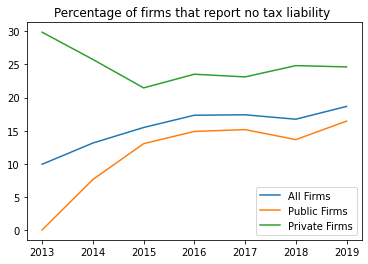

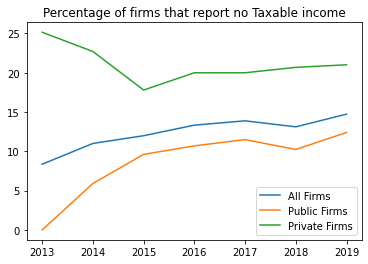

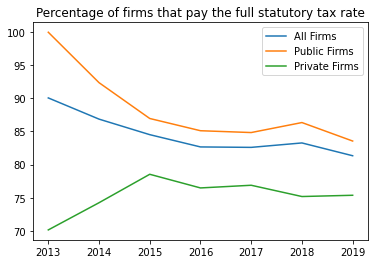

In [ ]:
import matplotlib.pyplot as plt

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.plot(years,no_tax,label = 'All Firms')
plt.plot(years,no_tax_public,label = 'Public Firms')
plt.plot(years,no_tax_private,label = 'Private Firms')
plt.title('Percentage of firms that report no tax liability ')
plt.legend()
plt.show()

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.plot(years,no_tax_inc,label = 'All Firms')
plt.plot(years,no_tax_public_inc,label = 'Public Firms')
plt.plot(years,no_tax_private_inc,label = 'Private Firms')
plt.title('Percentage of firms that report no Taxable income')
plt.legend()
plt.show()

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
plt.plot(years,pay_tax,label = 'All Firms')
plt.plot(years,pay_public_tax,label = 'Public Firms')
plt.plot(years,pay_private_tax,label = 'Private Firms')
plt.title('Percentage of firms that pay the full statutory tax rate')
plt.legend()
plt.show()




**e.**	Form a conclusion related to the data calculated and displayed in this step. What do you notice?

a) Percentage of firms that report no tax liability: As it can be seen from the graph, there seems to be an opposite correlation between public and private companies. Since the policy was passed, there was a decrease in the number of private companies that reported no tax liability, possibly to avoid public scrutiny. On the other hand, the  opposite seems to happen to public companies. Since public companies typically have public (discolosed) financial documents, it must have been harder for them to manipulate income statements - but since now private companies would have to disclose there tax payments, that difference was bridged, and public companies didn't felt the direct additional pressure.
b) Percentage of firms that report no taxable income: Just as in point a), there is a direct negative correlation between public and private companies, due to the aforementioned reasons.

c) Percentage of firms that pay the full statutory tax rate: As previously mentioned, the regulation "evened out the field", for which it is expected that public and private firms would meet in the middle.

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#ABBAEA;>

            
<p style="padding: 10px;
              color:white;">
                           
**#3 Analysis:**

There seems to be an opposite correlation between public and private companies. Since the policy was passed, there was a decrease in the number of private companies that reported no tax liability, possibly to avoid public scrutiny. On the other hand, the  opposite seems to happen to public companies because they typically have public (discolosed) financial documents, it must have been harder for them to manipulate income statements 
Thus, there is a direct negative correlation between public and private companies, due to the aforementioned reasons and the regulation "evened out the field", for which it is expected that public and private firms would meet in the middle.

## Calculate your Results- #4

**a.** Calculate the average (both mean and median) effective tax rate in each year for each type of firm (public, private, large and small). 

In [ ]:
Tax_payable_2013 = final.loc[final['Income Year'] == 2013, 'Tax payable']
Tax_payable_2014 = final.loc[final['Income Year'] == 2014, 'Tax payable']
Tax_payable_2015 = final.loc[final['Income Year'] == 2015, 'Tax payable']
Tax_payable_2016 = final.loc[final['Income Year'] == 2016, 'Tax payable']
Tax_payable_2017 = final.loc[final['Income Year'] == 2017, 'Tax payable']
Tax_payable_2018 = final.loc[final['Income Year'] == 2018, 'Tax payable']
Tax_payable_2019 = final.loc[final['Income Year'] == 2019, 'Tax payable']

In [ ]:
# ETR Mean of public firm

#first find the final_public with tax payable and taxable income values
final_public = final.loc[final['Public/Private'] == 'Public']
final_public.dropna(subset=['Tax payable', 'Taxable income'], how='all')


#ETR = tax payable / taxable income and the mean in each year
final_public['ETR_2013'] = Tax_payable_2013 / final_public['Taxable income'].mean()
final_public['ETR_2014'] = Tax_payable_2014 / final_public['Taxable income'].mean()
final_public['ETR_2015'] = Tax_payable_2015 / final_public['Taxable income'].mean()
final_public['ETR_2016'] = Tax_payable_2016 / final_public['Taxable income'].mean()
final_public['ETR_2017'] = Tax_payable_2017 / final_public['Taxable income'].mean()
final_public['ETR_2018'] = Tax_payable_2018 / final_public['Taxable income'].mean()
final_public['ETR_2019'] = Tax_payable_2019 / final_public['Taxable income'].mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# ETR Mean of private firm

#first find the final_public with tax payable and taxable income values
final_public = final.loc[final['Public/Private'] == 'Private']
final_public.dropna(subset=['Tax payable', 'Taxable income'], how='all')


#ETR = tax payable / taxable income and the mean in each year
final_private['ETR_2013'] = Tax_payable_2013 / final_private['Taxable income'].mean()
final_private['ETR_2014'] = Tax_payable_2014 / final_private['Taxable income'].mean()
final_private['ETR_2015'] = Tax_payable_2015 / final_private['Taxable income'].mean()
final_private['ETR_2016'] = Tax_payable_2016 / final_private['Taxable income'].mean()
final_private['ETR_2017'] = Tax_payable_2017 / final_private['Taxable income'].mean()
final_private['ETR_2018'] = Tax_payable_2018 / final_private['Taxable income'].mean()
final_private['ETR_2019'] = Tax_payable_2019 / final_private['Taxable income'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# ETR Median of public firm

#first find the final_public with tax payable and taxable income values
final_public = final.loc[final['Public/Private'] == 'Public']
final_public.dropna(subset=['Tax payable', 'Taxable income'], how='all')


#ETR = tax payable / taxable income and the mean in each year
final_public['ETR_2013'] = Tax_payable_2013 / final_public['Taxable income'].median()
final_public['ETR_2014'] = Tax_payable_2014 / final_public['Taxable income'].median()
final_public['ETR_2015'] = Tax_payable_2015 / final_public['Taxable income'].median()
final_public['ETR_2016'] = Tax_payable_2016 / final_public['Taxable income'].median()
final_public['ETR_2017'] = Tax_payable_2017 / final_public['Taxable income'].median()
final_public['ETR_2018'] = Tax_payable_2018 / final_public['Taxable income'].median()
final_public['ETR_2019'] = Tax_payable_2019 / final_public['Taxable income'].median()

In [ ]:
# ETR Median of private firm

#first find the final_public with tax payable and taxable income values
final_public = final.loc[final['Public/Private'] == 'Private']
final_public.dropna(subset=['Tax payable', 'Taxable income'], how='all')


#ETR = tax payable / taxable income and the mean in each year
final_private['ETR_2013'] = Tax_payable_2013 / final_private['Taxable income'].median()
final_private['ETR_2014'] = Tax_payable_2014 / final_private['Taxable income'].median()
final_private['ETR_2015'] = Tax_payable_2015 / final_private['Taxable income'].median()
final_private['ETR_2016'] = Tax_payable_2016 / final_private['Taxable income'].median()
final_private['ETR_2017'] = Tax_payable_2017 / final_private['Taxable income'].median()
final_private['ETR_2018'] = Tax_payable_2018 / final_private['Taxable income'].median()
final_private['ETR_2019'] = Tax_payable_2019 / final_private['Taxable income'].median()

**b.** Plot your results using an scatterplot. Try out different ways to portray the third, fourth variables - average type (mean or median), firm type (public or private).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


IndexingError: ignored

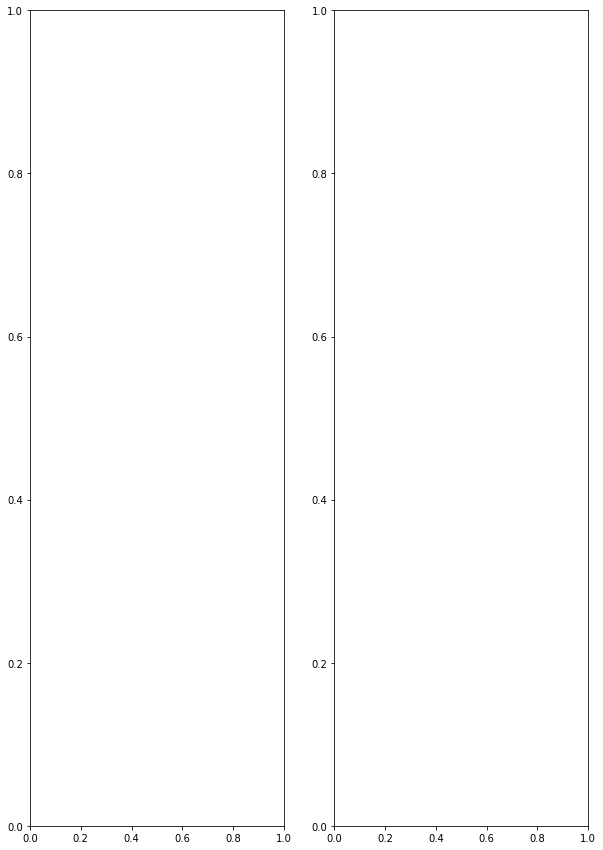

In [ ]:
# create an empty figure
# figsize width, height
fig= plt.figure(figsize = (10,15))

# add axes of equal sizes
# one row, two columns
topleft = fig.add_subplot(1, 2, 1)

topright = fig.add_subplot(1, 2, 2)


final[final_public['Public/Private'] == 'Public'].plot(x='Income Year', y='Public/Private', kind='scatter', ax= topleft, \
                                          title = 'Firm Type: Public', color = 'tab:blue', label = 'ETR Mean')
    
final[final_private['Public/Private'] == 'Private'].plot(x='Income Year', y='Public/Private', kind='scatter', ax= topright, \
                                         title = 'Firm Type: Private',  color = 'tab:blue', label = 'ETR Mean' )



final[final_public['Public/Private'] == 'Public'].plot(x='Income Year', y='Public/Private', kind='scatter', ax= topleft, \
                                          title = 'Firm Type: Public', color = 'tab:orange', label = 'ETR Median')
    
final[final_private['Public/Private'] == 'Private'].plot(x='Income Year', y='Public/Private', kind='scatter', ax= topright, \
                                          title = 'Firm Type: Private',  color = 'tab:orange', label = 'ETR Median')
    


#label x and y axis
topleft.set(xlabel='Income Year', ylabel='Firm Type')
topright.set(xlabel='Income Year', ylabel='Firm Type')


#overall figure title
fig.suptitle("Average (both mean and median) effective tax rate in each year for each type of firm (public and private)")


plt.tight_layout()

**c.**	Form a conclusion related to the data calculated and visualized in this step. What do you notice?






<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#ABBAEA;>

            
<p style="padding: 10px;
              color:white;">
                           
**#4 Analysis:**

The scatterplot streghtens point from question 3 where there seems to be an opposit correlation between public and private companies. As the tax ETR increases, private firms have an upward trend with their total income. On the other hand, the opposite seems to happen to public companies because the law lead to them disclosing financial documents and making them less profitable overall with less total income, which effects lower effective tax rate.


## Calculate your Results - #5

In this question you will study tax deductions as a percentage of Total income.
   
      
      
      

<div align = "center"> <font size = 5> $\frac{Total income - Taxable income}{Total income}$ </font> </div>


Where ``Total income - Taxable income = Tax Deductions Claimed``

**a.** Calculate the total tax deductions claimed as a percentage of total income for each firm in each year.

In [ ]:
Taxable_income_2013 = final.loc[final['Income Year'] == 2013, 'Taxable income']
Taxable_income_2014 = final.loc[final['Income Year'] == 2014, 'Taxable income']
Taxable_income_2015 = final.loc[final['Income Year'] == 2015, 'Taxable income']
Taxable_income_2016 = final.loc[final['Income Year'] == 2016, 'Taxable income']
Taxable_income_2017 = final.loc[final['Income Year'] == 2017, 'Taxable income']
Taxable_income_2018 = final.loc[final['Income Year'] == 2018, 'Taxable income']
Taxable_income_2019 = final.loc[final['Income Year'] == 2019, 'Taxable income']

In [ ]:
Tax_deductions_claimed = (final['Total income'] - final['Taxable income'])/final['Total income']

final['Tax deductions claimed_2013'] = (final['Total income'] - final['Taxable income'])/final['Total income']
final['Tax deductions claimed_2014'] = (final['Total income'] - final['Taxable income'])/final['Total income']
final['Tax deductions claimed_2015'] = (final['Total income'] - final['Taxable income'])/final['Total income']
final['Tax deductions claimed_2016'] = (final['Total income'] - final['Taxable income'])/final['Total income']
final['Tax deductions claimed_2017'] = (final['Total income'] - final['Taxable income'])/final['Total income']
final['Tax deductions claimed_2018'] = (final['Total income'] - final['Taxable income'])/final['Total income']
final['Tax deductions claimed_2019'] = (final['Total income'] - final['Taxable income'])/final['Total income']

**b.** Find the mean and median of the ratio you just calculated in each year. Further bifurcate your results for public and private firms.

In [ ]:
final['Tax deductions claimed_2013'] = (final['Total income'] - final['Taxable income'])/final['Total income'].mean()
final['Tax deductions claimed_2014'] = (final['Total income'] - final['Taxable income'])/final['Total income'].mean()
final['Tax deductions claimed_2015'] = (final['Total income'] - final['Taxable income'])/final['Total income'].mean()
final['Tax deductions claimed_2016'] = (final['Total income'] - final['Taxable income'])/final['Total income'].mean()
final['Tax deductions claimed_2017'] = (final['Total income'] - final['Taxable income'])/final['Total income'].mean()
final['Tax deductions claimed_2018'] = (final['Total income'] - final['Taxable income'])/final['Total income'].mean()
final['Tax deductions claimed_2019'] = (final['Total income'] - final['Taxable income'])/final['Total income'].mean()

In [ ]:
final['Tax deductions claimed_2013'] = (final['Total income'] - final['Taxable income'])/final['Total income'].median()
final['Tax deductions claimed_2014'] = (final['Total income'] - final['Taxable income'])/final['Total income'].median()
final['Tax deductions claimed_2015'] = (final['Total income'] - final['Taxable income'])/final['Total income'].median()
final['Tax deductions claimed_2016'] = (final['Total income'] - final['Taxable income'])/final['Total income'].median()
final['Tax deductions claimed_2017'] = (final['Total income'] - final['Taxable income'])/final['Total income'].median()
final['Tax deductions claimed_2018'] = (final['Total income'] - final['Taxable income'])/final['Total income'].median()
final['Tax deductions claimed_2019'] = (final['Total income'] - final['Taxable income'])/final['Total income'].median()

**c.** Create the same plot you did for #4b except plot tax deductions as a percentage of total income instead of ETRs.

In [ ]:
final[final_private['Public/Private'] == 'Private'].plot(x='Income Year', y='Public/Private', kind='scatter', \
                                          title = 'Firm Type: Private',  color = 'tab:orange', label = 'Total income')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [ ]:
final[final_public['Public/Private'] == 'Public'].plot(x='Income Year', y='Public/Private', kind='scatter', \
                                          title = 'Firm Type: Public',  color = 'tab:orange', label = 'Total income')

**d.** Create the following visualization:

- Create one figure with four axes- 2*2.

- In the first row plot mean ETRs in one axes and mean tax deductions as a percentage of total income on the other

- In the second row plot median ETRs in one axes and median tax deductions as a percentage of total income on the other

- Separate public and private firms with color

- Label everything

In [ ]:
# create an empty figure
# figsize width, height
fig= plt.figure(figsize = (10,15))

# add axes of equal sizes
# one row, two columns
topleft = fig.add_subplot(1, 2, 1)

topright = fig.add_subplot(1, 2, 2)

bottomleft = fig.add_subplot(2, 2, 3)

bottomright = fig.add_subplot(2, 2, 4)


final[final_public['Public/Private'] == 'Public'].plot(x='ETR', y='Public/Private', kind='scatter', ax= topleft, \
                                          title = 'Firm Type: Public', color = 'tab:blue', label = 'ETR Mean')
    
final[final_private['Public/Private'] == 'Private'].plot(x='Income Year', y='Public/Private', kind='scatter', ax= topright, \
                                         title = 'Firm Type: Private',  color = 'tab:blue', label = 'ETR Mean' )



final[final_public['Public/Private'] == 'Public'].plot(x='ETR', y='Public/Private', kind='scatter', ax= bottomleft, \
                                          title = 'Firm Type: Public', color = 'tab:blue', label = 'ETR Median')
    
final[final_private['Public/Private'] == 'Private'].plot(x='Income Year', y='Public/Private', kind='scatter', ax= bottomright, \
                                         title = 'Firm Type: Private',  color = 'tab:blue', label = 'ETR Median' )


#label x and y axis
topleft.set(xlabel='ETR', ylabel='Firm Type')
topright.set(xlabel='ETR', ylabel='Firm Type')


#overall figure title
fig.suptitle("ETRs in one axes and median tax deductions as a percentage of total income on the other")


plt.tight_layout()

**e.** Form a conclusion related to the data calculated and visualized in this step. What do you notice?

Once again, an opposite trend from public and private firms.

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#ABBAEA;>

            
<p style="padding: 10px;
              color:white;">
                           
**#5 Analysis:**

The scatterplot (again) streghtens point from question 3 and 4 where there seems to be an opposit correlation between public and private companies. As the tax ETR increases, private firms have an upward trend with their tax deductions as a percentage of total income. On the other hand, the opposite seems to happen to public companies because the law lead to them disclosing financial documents and making them less profitable overall with less tax deductions as a percentage of total income.

## Tell Others

Based on all of the evidence that you collected, what do you conclude about the effectiveness of the new tax transparency law in Australia? Did it have the effect that lawmakers intended?

Keep in mind that all of the analysis we did is descriptive, so we are unable to derive complete conclusions, however, we can still make general inferences.


<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#90EE90;>

            
<p style="padding: 10px;
              color:white;">
                           
**Final Conclusion:**


The Australian Government passed a policy in December 2015 to promote transparent reports and increase the tax collection. The percent change of tax payable in the 2015-2016 period increased by 20.18%, substantially higher than the 10.57% increase in Total Income. Both companies (public and private) reported an increase in total income with ann increase of collected taxes amounts. Due to a steady increase of this phenomena, the policy seems to be efficient.

Taking a deeper look into private firms, they yielded a higher percentage of companies that had positive percent changes in total income such as Hong Kong and Shanghai Banking Corporation, with a staggering 669.81%. However, its % change in taxable income and tax payable decreased significantly. Also, as the tax ETR increases, private firms have an upward trend with their total income, which shows how profitable they are. However, public companies have the opposite trend. because the law lead to them disclosing financial documents and making them less profitable overall with less total income, which effects lower effective tax rate.

This indicates that the policy has a loophole for private firms to fabricate their reporting of taxable income and tax payable or (generally) it's an ineffective policy for private firms as a whole. This explains why there was a decrease in the number of private companies that reported no tax liability. It also explains that the policy lead to them disclosing financial documents and making them less profitable overall with less total income, which effects lower effective tax rate. 

On the other hand, this also explains why the policy is effective for public companies by showing an opposite trend. They typically have public (discolosed) financial documents and it's harder for them to manipulate the income statements or find a loophole in the system when reporting.